## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
def frequenza_testa(N):
    serie = pd.Series(np.random.randint(0, 2, size = N))
    return serie.value_counts(normalize = True).get(0)

In [61]:
risultati = {"N": [], "freq": []}
for N in np.arange(10, 20000, 100):
    risultati["N"].append(N)
    risultati["freq"].append(frequenza_testa(N))

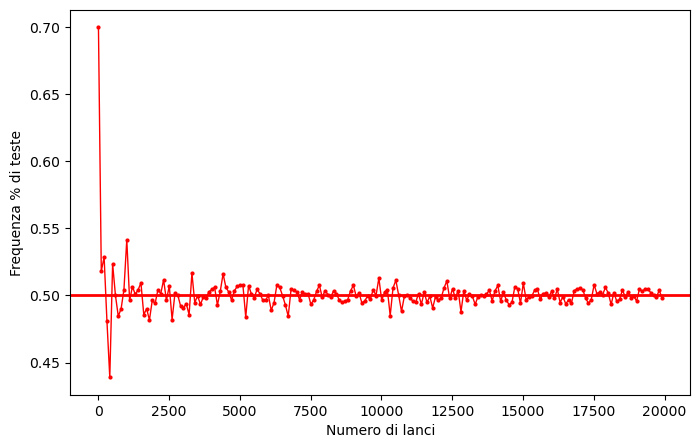

In [62]:
plt.figure(figsize=(8, 5))
plt.axhline(y=0.5, color = 'red', linestyle = '-', linewidth = 2)
plt.plot(risultati["N"], risultati["freq"], 'o-', markersize = 2, color = 'red', linewidth = 1, label = "Legge dei grandi numeri")
plt.xlabel("Numero di lanci")
plt.ylabel("Frequenza % di teste")
plt.show()

## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

In [63]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
# Numero di righe e colonne
df.shape

(891, 12)

In [65]:
# Valori mancanti per colonna
df.isnull().sum(axis = 0)

# oppure df.info()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
# Riempio i valori mancanti nella colonna 'Embarked' con il valore più frequente
df['Embarked'] = df['Embarked'].fillna((df['Embarked'].mode())[0])

In [67]:
# Rimuovo le righe dove il valore di 'Age' è mancante
df.dropna(subset = 'Age', inplace = True)

In [68]:
# Righe duplicate
df.drop_duplicates()
df.shape

(714, 12)

In [69]:
# Età media dei passeggeri per ogni classe 
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

<Axes: xlabel='Pclass', ylabel='Age'>

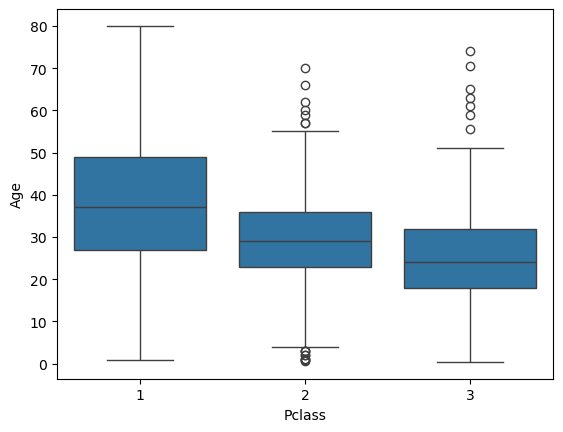

In [70]:
# Distribuzione dell'età per classe
sns.boxplot(data = df, x = 'Pclass', y = 'Age')

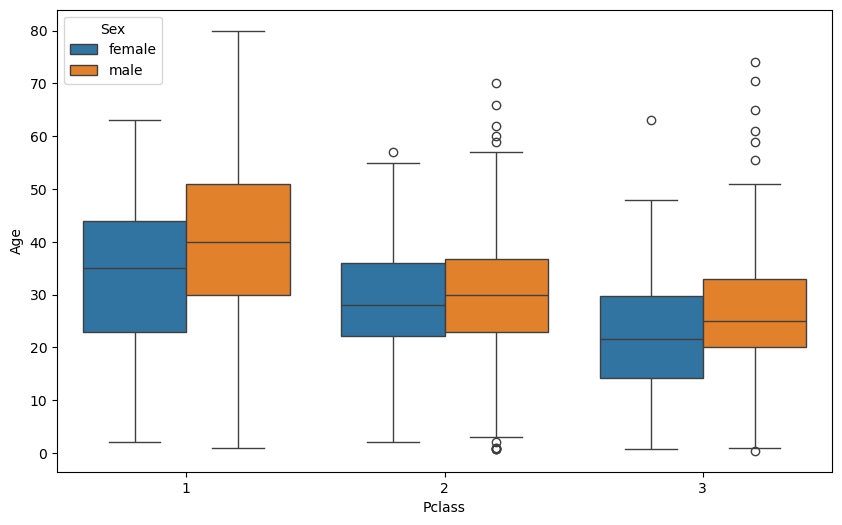

In [71]:
# Distribuzione dell'età per classe dividendo e mostrando insieme i dati di uomini e donne
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = 'Pclass', y = 'Age', hue = 'Sex')
plt.show()

## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Distribuzione delle specie
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [ ]:
# Lunghezza media dei petali per specie
df.groupby('species')['petal_length'].mean()

species
setosa        0.246
versicolor    1.326
virginica     2.026
Name: petal_width, dtype: float64

In [ ]:
# Larghezza media dei petali per specie
df.groupby('species')['petal_width'].mean()

In [84]:
# Lunghezza e larghezza media dei petali per specie
df.groupby('species')[['petal_length', 'petal_width']].mean()


,petal_length,petal_width
species,,
setosa,1.462,0.246
versicolor,4.260,1.326
virginica,5.552,2.026


<Axes: xlabel='petal_length', ylabel='petal_width'>

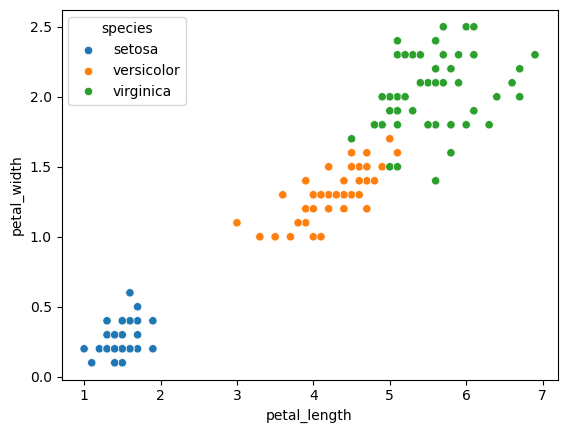

In [85]:
# Dimensioni dei petali per specie
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')

In [88]:
# Area del petalo
df['petal_area'] = df['petal_length'] * df['petal_width']
print(df)

df.groupby('species')['petal_area'].describe()

     sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     petal_area  
0          0.28  
1          0.28  
2          0.26  
3          0.30  
4          0.28  
..          ...  
145      

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,0.3656,0.181155,0.11,0.2800,0.300,0.42,0.96
versicolor,50.0,5.7204,1.368403,3.30,4.8600,5.615,6.75,8.64
virginica,50.0,11.2962,2.157412,7.50,9.7175,11.445,12.79,15.87


<Axes: xlabel='species', ylabel='petal_area'>

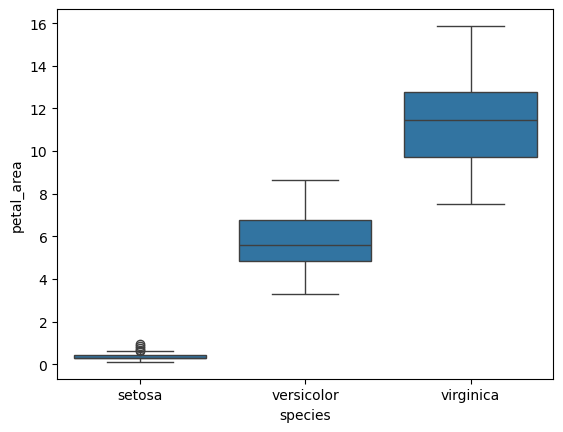

In [96]:
# Distribuzione dell'area del petalo per specie
sns.boxplot(data = df, x = 'species', y = 'petal_area')